In [ ]:
# pip install langid

In [2]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
import spacy 

# language identification:
import langid 
from nltk.classify.textcat import TextCat 
nltk.download('crubadan') 

from matplotlib.pyplot import plot 
import seaborn as sns

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import phik
import warnings

# for all NLP related operations on text and identify the sentiment of text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# for NER
import spacy
from spacy import displacy  
import es_core_news_md

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

## 1. Clean and select only reviews in english

In [3]:
df = pd.read_csv('../data/dataTwitter.csv')
df.head()

,reviewId,content,score
0,9cbb59a4-d650-47df-9927-01acf882ef06,Never had or was intestate in jumping on Twitt...,5
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5
4,8cfefb07-7f70-4214-abed-3929ae2069e7,tem erros de rede social anã! menção que não c...,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  30000 non-null  object
 1   content   29999 non-null  object
 2   score     30000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


### Drop nulls and duplicates:

In [5]:
df.isna().sum()

reviewId    0
content     1
score       0
dtype: int64

In [6]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.shape

(29999, 3)

### Identifying which tweets are in English with TextCat and LangId:

In [9]:
sample = df[0:20]

# 1: TextCat, N-Gram-Based Text Categorization
tc = TextCat()
sample['textcat'] = sample['content'].apply(tc.guess_language)

# 2. landgid
sample['langid'] =sample['content'].apply(langid.classify)

sample

c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviewId,content,score,textcat,langid
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,eng,"(en, -620.0158731937408)"
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,eng,"(en, -70.48954057693481)"
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,eng,"(en, -28.654385328292847)"
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,ces,"(en, -101.70465660095215)"
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,por,"(pt, -420.5483157634735)"
5,5544dec2-65f2-4bec-9b16-b133c2849435,Works for me!,4,eng,"(en, 3.6767330169677734)"
6,8dd0dfeb-7857-4f8e-af57-4241978ed851,Love it,5,eng,"(en, 9.061840057373047)"
7,7e0d650f-de94-4700-a7d9-f6f9081acb15,Good,5,pcm,"(en, 9.061840057373047)"
8,487c6910-0329-4599-a38c-2ad791bf9faa,Excellent,5,dan,"(de, 1.7007880210876465)"
9,da8450c4-b60a-402b-b514-27acf173adf7,Nice,5,hsb,"(en, 9.061840057373047)"


#### As we can see, automatic language identification, especially on very short texts, is very error prone, we'll pick only the reviews labeled as written in english by both identifiers:

In [11]:
langid = df['content'].apply(langid.classify)

df['langid'] = langid.apply(lambda tuple: tuple[0]) # get just the language label
df['textcat'] = df['content'].apply(tc.guess_language)

df.head()

,reviewId,content,score,langid,textcat
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,pt,por


In [12]:
df['langid'].value_counts()

en    25117
de      638
ja      504
es      380
zh      364
      ...  
uk        2
ku        2
ky        1
is        1
be        1
Name: langid, Length: 90, dtype: int64

In [13]:
df['textcat'].value_counts().head()

eng     17487
eng      2958
pcm      2143
abk       674
hsb       655
Name: textcat, dtype: int64

We can see two different labels for 'english' in TextCat, let's solve it:

In [14]:
df['textcat'].unique()

array(['eng', 'ces', 'por', 'eng ', 'pcm', 'dan', 'hsb', 'nob', 'abk',
       'ltz', 'sun', 'spa', 'vec', 'lat', 'lug', 'kos', 'cat', 'pag',
       'vmf', 'iso', 'glv', 'nds', 'nap', 'aka', 'deu', 'cym', 'som',
       'dhv', 'nbl', 'fri', 'sco', 'quh', 'bre', 'cnh', 'afr', 'fra',
       'ssw', 'tzc', 'swe', 'arb', 'wol', 'vmw', 'epo', 'gya', 'eus',
       'hve', 'sot', 'nno', 'gaz', 'hin', 'kha', 'fuf', 'chk', 'xho',
       'swh', 'mly', 'tam', 'roh', 'fur', 'ven', 'miq', 'nld', 'ojw',
       'luo', 'gsc', 'mlt', 'sus', 'tpi', 'lms', 'zea', 'ang', 'pes',
       'ogo', 'czt', 'fin', 'hne', 'isl', 'kac', 'hau', 'lnc', 'kal',
       'fub', 'arl', 'est', 'ita', 'hil', 'her', 'gla', 'mfe', 'slv',
       'frr', 'mal', 'hat', 'sme', 'tgl', 'fao', 'pol', 'urd', 'zul',
       'pau', 'nso', 'nau', 'bis', 'ada', 'efi', 'als', 'tet', 'rup',
       'hrv', 'glg', 'bar', 'lld', 'meu', 'ind', 'bcl', 'dsb', 'lad',
       'ceb', 'sum', 'frp', 'hmo', 'mah', 'mya', 'plt', 'cuk', 'vls',
       'tur', 'nmf'

In [15]:
# removing spaces 
df['textcat'] = df['textcat'].str.strip()
df['textcat'].value_counts()

eng    20445
pcm     2143
abk      674
hsb      655
nds      648
       ...  
gkp        1
mwv        1
bcl        1
mad        1
nyk        1
Name: textcat, Length: 282, dtype: int64

In [ ]:
# top_10_contributors = no_na_authors.full_name.value_counts().head(10)

# fig, ax = plt.subplots(figsize=(10,10))
# ax.bar(top_10_contributors.index, top_10_contributors.values)
# ax.set_xlabel("Authors")
# ax.set_ylabel("N° of contributions")
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# plt.show()

In [ ]:
# # convert our list of languages to a dataframe
# langs_df = pd.DataFrame(langs)

# # count the number of times we see each language
# langs_count = langs_df.Tweet.value_counts()

# # horrible-looking barplot (I would suggest using R for visualization)
# langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [16]:
def in_english (row):
   if row['textcat'] == 'eng' and row['langid'] == 'en':
      return 1
   else:
      return 0


In [17]:
df['in_english'] = df.apply (lambda row: in_english(row), axis=1)
df.head()

,reviewId,content,score,langid,textcat,in_english
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces,0
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,pt,por,0


In [18]:
df['in_english'].value_counts()

1    18812
0    11187
Name: in_english, dtype: int64

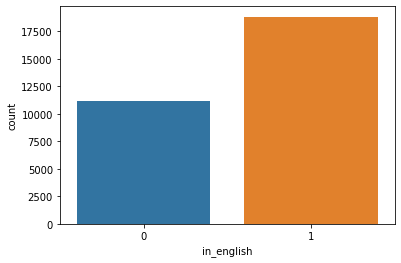

In [19]:
sns.countplot(x = 'in_english', data=df);

In [49]:
pd.set_option('max_colwidth', None) # to read the entire reviews
df.head(30)

,reviewId,content,score,langid,textcat,in_english
0,9cbb59a4-d650-47df-9927-01acf882ef06,Never had or was intestate in jumping on Twitt...,5,en,eng,1
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces,0
4,8cfefb07-7f70-4214-abed-3929ae2069e7,tem erros de rede social anã! menção que não c...,2,pt,por,0
5,5544dec2-65f2-4bec-9b16-b133c2849435,Works for me!,4,en,eng,1
6,8dd0dfeb-7857-4f8e-af57-4241978ed851,Love it,5,en,eng,1
7,7e0d650f-de94-4700-a7d9-f6f9081acb15,Good,5,en,pcm,0
8,487c6910-0329-4599-a38c-2ad791bf9faa,Excellent,5,de,dan,0
9,da8450c4-b60a-402b-b514-27acf173adf7,Nice,5,en,hsb,0


In [20]:
#df.to_csv('../data/dataTwitter_EN.csv', index=False)

#### Let's keep only the reviews in english and count the number of words by review 

In [3]:
df = pd.read_csv('../data/dataTwitter_EN.csv')
pd.set_option('max_colwidth', None) # to read the entire reviews
df.head()

,reviewId,content,score,langid,textcat,in_english
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces,0
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,pt,por,0


In [4]:
df = df[(df['in_english'] == 1)]
df.shape

(18812, 6)

In [5]:
df['word_count'] = df['content'].str.split().map(lambda x: len(x))
df.head()

,reviewId,content,score,langid,textcat,in_english,word_count
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1,49
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1,7
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1,3
5,5544dec2-65f2-4bec-9b16-b133c2849435,Works for me!,4,en,eng,1,3
6,8dd0dfeb-7857-4f8e-af57-4241978ed851,Love it,5,en,eng,1,2


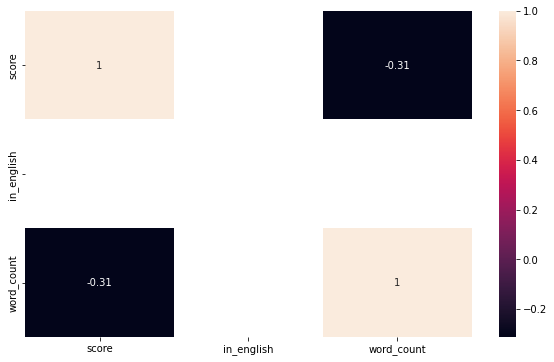

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True);

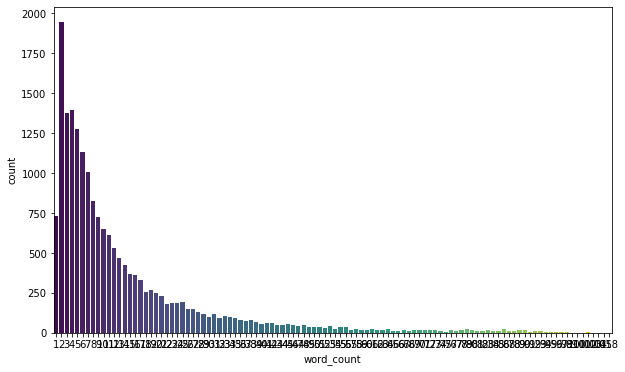

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'word_count', data=df, palette='viridis');

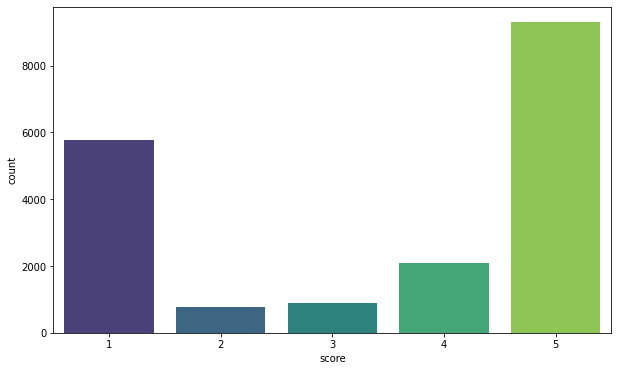

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'score', data=df, palette='viridis');

Sentiment label

1. Vader SIA:

In [8]:
sia = SentimentIntensityAnalyzer()
texts = df['content'].tolist()
negative_scores = []
neutral_scores = []
positive_scores = []
compound_scores = []
final_tag = []
for text in texts:
    score_dictionary = sia.polarity_scores(text)
    negative_scores.append(score_dictionary['neg'])
    positive_scores.append(score_dictionary['pos'])
    neutral_scores.append(score_dictionary['neu'])
    compound_scores.append(score_dictionary['compound'])
    if score_dictionary['compound']>0:
        final_tag.append('positive')
    elif score_dictionary['compound']<0:
        final_tag.append('negative')
    else:
        final_tag.append('neutral')
# df['negative_score'] = negative_scores
# df['positive_score'] = positive_scores
# df['neutral_score'] = neutral_scores
# df['compound_score'] = compound_scores
df['VADER'] = final_tag

2. textblob

In [9]:
texts = df['content'].tolist()
textblob_score = []
textblob_tag = []
for text in texts:
    doc_current = textblob.TextBlob(text)
    score = doc_current.polarity
    textblob_score.append(score)
    if score > 0:
        textblob_tag.append('positive')
    elif score<0:
        textblob_tag.append('negative')
    else:
        textblob_tag.append('neutral')
# df['textblob_score'] = textblob_score
# df['textblob_sentiment_tag'] = textblob_tag
df['TextBlob'] = textblob_tag

In [10]:
df.head()

,reviewId,content,score,langid,textcat,in_english,word_count,VADER,TextBlob
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1,49,positive,positive
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1,7,neutral,neutral
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1,3,positive,positive
5,5544dec2-65f2-4bec-9b16-b133c2849435,Works for me!,4,en,eng,1,3,neutral,neutral
6,8dd0dfeb-7857-4f8e-af57-4241978ed851,Love it,5,en,eng,1,2,positive,positive


In [11]:
df.shape

(18812, 9)

In [12]:
def sentiment (row):
   if row['VADER'] ==  row['TextBlob']:
      return row['VADER']
   else:
      return 0

In [13]:
df['sentiment'] = df.apply (lambda row: sentiment(row), axis=1)
df.head(30)

,reviewId,content,score,langid,textcat,in_english,word_count,VADER,TextBlob,sentiment
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1,49,positive,positive,positive
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1,7,neutral,neutral,neutral
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1,3,positive,positive,positive
5,5544dec2-65f2-4bec-9b16-b133c2849435,Works for me!,4,en,eng,1,3,neutral,neutral,neutral
6,8dd0dfeb-7857-4f8e-af57-4241978ed851,Love it,5,en,eng,1,2,positive,positive,positive
10,d1a56ca6-bddd-47db-89e0-eb0ceb1fb16a,Bad experience,1,en,eng,1,2,negative,negative,negative
12,ee6aa622-fd79-457f-8884-584cb5a34a57,"Finally twitter is back to being a place to see both sides, different opinions & the ability express one's own thoughts w/o fear of being censored! BRAVO!",5,en,eng,1,27,negative,positive,0
13,91ef20e0-6f10-4f94-bf7e-cfc0dda4cf31,Fire uncut raw better than PHuB,5,en,eng,1,6,positive,negative,0
14,567a156e-2df0-42a1-b1c6-d52147a8297c,Very easy to use. Very intuitive app.,5,en,eng,1,7,positive,positive,positive
15,82c62e77-db77-4d88-95d4-2ceb2a4fb4a0,Very useful application. I should help to reform new world order.,5,en,eng,1,11,positive,positive,positive


In [14]:
df.to_csv('../data/dataTwitter_EN_SENT.csv', index=False)